In [ ]:
#installs
#pip install datapane

In [ ]:
#pip install ipywidgets

In [1]:
#conda install -c conda-forge ipywidgets

In [2]:
#imports
import pandas as pd
import seaborn as sns
import numpy as np

from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets

import datapane as dp 
import plotly.express as px

In [3]:
#importing dataset scraped from Twitter by Tiber (manually altered CSV file, bacause Niger column contained strings
#replaced strings with integers)
data = pd.read_csv('C:/Users/eb808/Downloads/schmidt_team4-master (2)/schmidt_team4-master/fromMay20.csv')
data

,Unnamed: 0,Abia,Adamawa,Akwa Ibom,Anambra,Bauchi,Bayelsa,Benue,Borno,Cross River,...,Ogun,Ondo,Osun,Oyo,Plateau,Rivers,Sokoto,Taraba,Yobe,Zamfara
0,2020-08-18 22:20:18+00:00,2.0,0.0,0.0,4.0,11.0,0.0,0,0.0,0,...,16.0,30.0,0,13.0,21.0,1.0,0.0,0.0,0.0,0
1,2020-08-17 22:25:45+00:00,28.0,0.0,0.0,21.0,13.0,0.0,0,0.0,0,...,1.0,38.0,0,9.0,20.0,0.0,0.0,0.0,0.0,0
2,2020-08-16 22:27:47+00:00,0.0,0.0,4.0,0.0,1.0,0.0,0,3.0,4,...,18.0,14.0,17,6.0,108.0,1.0,0.0,0.0,0.0,0
3,2020-08-15 22:26:18+00:00,0.0,0.0,0.0,0.0,1.0,0.0,0,1.0,0,...,10.0,8.0,8,9.0,19.0,12.0,0.0,0.0,0.0,0
4,2020-08-14 22:42:06+00:00,0.0,0.0,5.0,0.0,1.0,6.0,0,4.0,0,...,14.0,0.0,10,8.0,24.0,2.0,0.0,0.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
86,2020-05-23 22:51:25+00:00,0.0,0.0,0.0,NaN,NaN,0.0,0,NaN,0,...,NaN,0.0,0,NaN,NaN,0.0,0.0,0.0,0.0,0
87,2020-05-22 22:35:01+00:00,0.0,0.0,NaN,NaN,NaN,NaN,0,NaN,0,...,NaN,NaN,0,NaN,NaN,NaN,NaN,0.0,NaN,0
88,2020-05-21 22:48:23+00:00,0.0,NaN,0.0,0.0,NaN,0.0,0,0.0,0,...,NaN,NaN,0,NaN,NaN,NaN,0.0,0.0,NaN,0
89,2020-05-20 22:20:41+00:00,NaN,0.0,0.0,0.0,0.0,0.0,0,NaN,0,...,0.0,0.0,0,NaN,NaN,NaN,0.0,NaN,0.0,0


In [4]:
data_minus_tail = data.iloc[:-6,:]

In [5]:
#replace all nans with 0
data = data_minus_tail.replace(np.nan,0)

In [6]:
#make another dataframe that everyday adds previous number of cases to new cases
summed_data = data.copy()

for a in range(len(data.columns)-1):

    col_n = summed_data.iloc[:,a+1].tolist()
    new_col_values = []
    i = 0
    
    for value in col_n:
        i = i+value
        new_col_values.append(i)

    summed_data.iloc[:,a+1] = new_col_values
summed_data

,Unnamed: 0,Abia,Adamawa,Akwa Ibom,Anambra,Bauchi,Bayelsa,Benue,Borno,Cross River,...,Ogun,Ondo,Osun,Oyo,Plateau,Rivers,Sokoto,Taraba,Yobe,Zamfara
0,2020-08-18 22:20:18+00:00,2.0,0.0,0.0,4.0,11.0,0.0,0,0.0,0,...,16.0,30.0,0,13.0,21.0,1.0,0.0,0.0,0.0,0
1,2020-08-17 22:25:45+00:00,30.0,0.0,0.0,25.0,24.0,0.0,0,0.0,0,...,17.0,68.0,0,22.0,41.0,1.0,0.0,0.0,0.0,0
2,2020-08-16 22:27:47+00:00,30.0,0.0,4.0,25.0,25.0,0.0,0,3.0,4,...,35.0,82.0,17,28.0,149.0,2.0,0.0,0.0,0.0,0
3,2020-08-15 22:26:18+00:00,30.0,0.0,4.0,25.0,26.0,0.0,0,4.0,4,...,45.0,90.0,25,37.0,168.0,14.0,0.0,0.0,0.0,0
4,2020-08-14 22:42:06+00:00,30.0,0.0,9.0,25.0,27.0,6.0,0,8.0,4,...,59.0,90.0,35,45.0,192.0,16.0,0.0,0.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
80,2020-05-29 22:46:01+00:00,663.0,143.0,205.0,170.0,362.0,310.0,390,406.0,69,...,1268.0,1306.0,673,2651.0,1710.0,1711.0,39.0,55.0,18.0,0
81,2020-05-28 22:27:18+00:00,663.0,143.0,215.0,170.0,363.0,310.0,390,407.0,69,...,1272.0,1306.0,673,2659.0,1712.0,1716.0,39.0,55.0,18.0,0
82,2020-05-27 22:44:12+00:00,665.0,154.0,226.0,171.0,363.0,310.0,392,408.0,69,...,1273.0,1306.0,673,2661.0,1714.0,1730.0,39.0,55.0,18.0,0
83,2020-05-26 22:30:43+00:00,666.0,154.0,226.0,171.0,364.0,310.0,392,409.0,69,...,1274.0,1307.0,673,2667.0,1714.0,1766.0,39.0,55.0,18.0,0


In [7]:
#save new dataset as a new csv file
summed_data.to_csv('data/summed_data.csv')


In [8]:
#add overall nigeria to dataset
nigeria_new_cases =[]

for row in range(len(data)):
    value = sum(data.iloc[row,1:])
    nigeria_new_cases.append(value)

data['Nigeria'] = nigeria_new_cases

In [9]:
#add overall nigeria to dataset
nigeria_cases =[]

for row in range(len(summed_data)):
    value = sum(summed_data.iloc[row,1:])
    nigeria_cases.append(value)

summed_data['Nigeria'] = nigeria_cases

In [10]:
summed_data.iloc[:-1]

,Unnamed: 0,Abia,Adamawa,Akwa Ibom,Anambra,Bauchi,Bayelsa,Benue,Borno,Cross River,...,Ondo,Osun,Oyo,Plateau,Rivers,Sokoto,Taraba,Yobe,Zamfara,Nigeria
0,2020-08-18 22:20:18+00:00,2.0,0.0,0.0,4.0,11.0,0.0,0,0.0,0,...,30.0,0,13.0,21.0,1.0,0.0,0.0,0.0,0,410.0
1,2020-08-17 22:25:45+00:00,30.0,0.0,0.0,25.0,24.0,0.0,0,0.0,0,...,68.0,0,22.0,41.0,1.0,0.0,0.0,0.0,0,827.0
2,2020-08-16 22:27:47+00:00,30.0,0.0,4.0,25.0,25.0,0.0,0,3.0,4,...,82.0,17,28.0,149.0,2.0,0.0,0.0,0.0,0,1125.0
3,2020-08-15 22:26:18+00:00,30.0,0.0,4.0,25.0,26.0,0.0,0,4.0,4,...,90.0,25,37.0,168.0,14.0,0.0,0.0,0.0,0,1450.0
4,2020-08-14 22:42:06+00:00,30.0,0.0,9.0,25.0,27.0,6.0,0,8.0,4,...,90.0,35,45.0,192.0,16.0,0.0,0.0,0.0,0,1779.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
79,2020-05-30 22:55:54+00:00,663.0,143.0,205.0,170.0,360.0,310.0,390,400.0,69,...,1305.0,673,2636.0,1708.0,1697.0,39.0,55.0,16.0,0,38357.0
80,2020-05-29 22:46:01+00:00,663.0,143.0,205.0,170.0,362.0,310.0,390,406.0,69,...,1306.0,673,2651.0,1710.0,1711.0,39.0,55.0,18.0,0,38744.0
81,2020-05-28 22:27:18+00:00,663.0,143.0,215.0,170.0,363.0,310.0,390,407.0,69,...,1306.0,673,2659.0,1712.0,1716.0,39.0,55.0,18.0,0,38926.0
82,2020-05-27 22:44:12+00:00,665.0,154.0,226.0,171.0,363.0,310.0,392,408.0,69,...,1306.0,673,2661.0,1714.0,1730.0,39.0,55.0,18.0,0,39315.0


In [11]:
#makes barplot for covid 19 cases using twitter scrape data
states_list = data.columns[1:].tolist()

def f(State):
    #fig = px.line(x =data['Unnamed: 0'], y = data[State][::-1]) 
    
    fig = px.bar(x=data['Unnamed: 0'], y=data[State][::-1],labels=dict(x='Date', y="Number of Covid-19 cases"))
    return fig
fig1 = interact(f, State=states_list)
fig1

interactive(children=(Dropdown(description='State', options=('Abia', 'Adamawa', 'Akwa Ibom', 'Anambra', 'Bauch…

<function __main__.f(State)>

In [178]:
#explored options for saving figures as html files
#import plotly.graph_objects as go
#help(go.Figure.write_html)

In [12]:
#makes barplot with cumulative cases
state_list = summed_data.columns[1:].tolist()

def f(State):
    #fig = px.line(x =data['Unnamed: 0'], y = data[State][::-1]) 
    
    fig = px.bar(x=summed_data['Unnamed: 0'], y=summed_data[State][::-1],labels=dict(x='Date', y="Number of Covid-19 cases"))
    fig.show()

fig2 = interact(f, State=state_list)

interactive(children=(Dropdown(description='State', options=('Abia', 'Adamawa', 'Akwa Ibom', 'Anambra', 'Bauch…

In [13]:
newcases = data.Nigeria.tolist()
timestamp = data['Unnamed: 0'].tolist()

In [14]:
cumulativecases =summed_data.Nigeria.tolist()

In [15]:
datadict ={}

array = timestamp[::-1]
datadict['Timestamp'] = array
datadict['New_cases'] = newcases
datadict['Cumulative_cases'] = cumulativecases
#datadict

In [16]:
df = pd.DataFrame(datadict)

In [17]:
df.Timestamp

0     2020-05-25 22:34:33+00:00
1     2020-05-26 22:30:43+00:00
2     2020-05-27 22:44:12+00:00
3     2020-05-28 22:27:18+00:00
4     2020-05-29 22:46:01+00:00
                ...            
80    2020-08-14 22:42:06+00:00
81    2020-08-15 22:26:18+00:00
82    2020-08-16 22:27:47+00:00
83    2020-08-17 22:25:45+00:00
84    2020-08-18 22:20:18+00:00
Name: Timestamp, Length: 85, dtype: object

In [18]:
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
import io, base64, os, json, re 
import pandas as pd
import numpy as np
import datetime
from random import randint

In [267]:
#df['New_cases'].pct_change()

In [19]:
#take random sets of sequential rows
new_set = []

for row_set in range(0, 1000):
    if row_set%2==0:print(row_set)
    row_quant = randint(3,6)
    row_start = randint(0, len(df)-row_quant)
    df_subset = df.iloc[row_start:row_start+row_quant]
    
    last_data = max(df_subset['Timestamp'])
    if row_set%2 ==0: print(last_data)
    
    
    new_cases_gap = df_subset['New_cases'].pct_change()
    daily_change = ((df_subset['Cumulative_cases'] - (df_subset['Cumulative_cases']-df_subset['New_cases']))/(df_subset['Cumulative_cases']-df_subset['New_cases']))
    Outcome_Next_Day_Direction = (df_subset['Cumulative_cases'].shift(-1) - df_subset['Cumulative_cases'])

    new_set.append(pd.DataFrame({'ID': [row_set]*len(df_subset), 'Last_date': [last_data]*len(df_subset),
                                'New_cases_gap': new_cases_gap, 'Daily_change':daily_change,
                                'Outcome_next_day_direction':Outcome_Next_Day_Direction}))

0
2020-08-12 22:29:55+00:00
2
2020-06-15 22:50:54+00:00
4
2020-06-23 22:30:26+00:00
6
2020-08-08 22:21:40+00:00
8
2020-07-14 22:37:57+00:00
10
2020-06-01 22:52:10+00:00
12
2020-08-11 22:17:25+00:00
14
2020-07-10 22:43:29+00:00
16
2020-07-08 22:53:07+00:00
18
2020-08-05 22:16:11+00:00
20
2020-06-06 22:38:22+00:00
22
2020-07-01 22:54:03+00:00
24
2020-06-15 22:50:54+00:00
26
2020-07-24 22:26:08+00:00
28
2020-06-29 22:23:35+00:00
30
2020-07-01 22:54:03+00:00
32
2020-06-10 22:52:49+00:00
34
2020-07-26 21:48:38+00:00
36
2020-07-21 22:55:47+00:00
38
2020-08-18 22:20:18+00:00
40
2020-08-01 22:28:40+00:00
42
2020-07-14 22:37:57+00:00
44
2020-07-24 22:26:08+00:00
46
2020-07-14 22:37:57+00:00
48
2020-06-13 22:42:48+00:00
50
2020-07-22 22:15:49+00:00
52
2020-07-30 22:19:54+00:00
54
2020-07-08 22:53:07+00:00
56
2020-06-04 22:43:49+00:00
58
2020-06-01 22:52:10+00:00
60
2020-07-17 22:48:09+00:00
62
2020-08-14 22:42:06+00:00
64
2020-06-02 22:47:47+00:00
66
2020-06-14 22:43:41+00:00
68
2020-07-25 22:56

610
2020-07-16 06:08:16+00:00
612
2020-06-26 22:50:14+00:00
614
2020-06-27 22:42:47+00:00
616
2020-08-01 22:28:40+00:00
618
2020-07-20 22:35:27+00:00
620
2020-07-05 22:36:43+00:00
622
2020-05-27 22:44:12+00:00
624
2020-08-14 22:42:06+00:00
626
2020-06-11 22:48:24+00:00
628
2020-07-16 22:53:35+00:00
630
2020-08-04 22:44:28+00:00
632
2020-06-01 22:52:10+00:00
634
2020-08-10 22:21:00+00:00
636
2020-06-05 22:42:27+00:00
638
2020-07-10 22:43:29+00:00
640
2020-06-05 22:42:27+00:00
642
2020-08-05 22:16:11+00:00
644
2020-07-27 22:32:48+00:00
646
2020-06-17 22:18:41+00:00
648
2020-08-09 22:17:45+00:00
650
2020-07-30 22:19:54+00:00
652
2020-06-16 23:00:42+00:00
654
2020-06-04 22:43:49+00:00
656
2020-08-18 22:20:18+00:00
658
2020-07-13 22:39:07+00:00
660
2020-07-25 22:56:10+00:00
662
2020-07-28 22:29:48+00:00
664
2020-06-03 22:54:55+00:00
666
2020-07-19 22:30:45+00:00
668
2020-06-14 22:43:41+00:00
670
2020-06-15 22:50:54+00:00
672
2020-06-06 22:38:22+00:00
674
2020-06-26 22:50:14+00:00
676
2020-0

In [20]:
new_set_df = pd.concat(new_set)
print(new_set_df.shape)
new_set_df = new_set_df.dropna(how ='any')
print(new_set_df.shape)
new_set_df.tail(20)

(4445, 5)
(2420, 5)


,ID,Last_date,New_cases_gap,Daily_change,Outcome_next_day_direction
21,993,2020-06-17 22:18:41+00:00,0.544554,0.077209,648.0
22,993,2020-06-17 22:18:41+00:00,0.038462,0.074431,555.0
7,994,2020-06-03 22:54:55+00:00,-0.066225,0.162380,290.0
8,994,2020-06-03 22:54:55+00:00,-0.314421,0.095773,437.0
54,995,2020-07-22 22:15:49+00:00,0.092593,0.024840,452.0
55,995,2020-07-22 22:15:49+00:00,-0.303544,0.016881,675.0
56,995,2020-07-22 22:15:49+00:00,0.493363,0.024791,436.0
8,996,2020-06-06 22:38:22+00:00,-0.314421,0.095773,437.0
9,996,2020-06-06 22:38:22+00:00,0.506897,0.131706,444.0
10,996,2020-06-06 22:38:22+00:00,0.016018,0.118242,443.0


In [21]:
#create sequences
# simplify the data by binning values into three groups
 
# Close_Gap
new_set_df['New_cases_gap_LMH'] = pd.qcut(new_set_df['New_cases_gap'], 3, labels=["L", "M", "H"])

# High_Gap - not used in this example
new_set_df['Daily_change_LMH'] = pd.qcut(new_set_df['Daily_change'], 3, labels=["L", "M", "H"])

In [21]:
new_set_df.columns

Index(['ID', 'Last_date', 'New_cases_gap', 'Daily_change',
       'Outcome_next_day_direction', 'New_cases_gap_LMH', 'Daily_change_LMH'],
      dtype='object')

In [22]:
# new set
new_set_df = new_set_df[["ID", 
                         "Last_date", 
                         "New_cases_gap_LMH", 
                         "Daily_change_LMH",
                         "Outcome_next_day_direction"]]
                         
new_set_df['Event_Pattern'] = new_set_df['New_cases_gap_LMH'].astype(str) + new_set_df['Daily_change_LMH'].astype(str)

In [23]:
new_set_df.tail(10)

,ID,Last_date,New_cases_gap_LMH,Daily_change_LMH,Outcome_next_day_direction,Event_Pattern
11,996,2020-06-06 22:38:22+00:00,M,H,354.0,MH
28,997,2020-06-26 22:50:14+00:00,M,H,559.0,MH
29,997,2020-06-26 22:50:14+00:00,M,M,556.0,MM
30,997,2020-06-26 22:50:14+00:00,M,M,606.0,MM
31,997,2020-06-26 22:50:14+00:00,M,M,594.0,MM
52,998,2020-07-19 22:30:45+00:00,L,M,594.0,LM
53,998,2020-07-19 22:30:45+00:00,L,M,649.0,LM
56,999,2020-07-24 22:26:08+00:00,H,M,436.0,HM
57,999,2020-07-24 22:26:08+00:00,L,L,661.0,LL
58,999,2020-07-24 22:26:08+00:00,H,M,667.0,HM


In [24]:
new_set_df['Outcome_next_day_direction'].describe()

count    2420.000000
mean      477.742149
std       162.655548
min         0.000000
25%       386.750000
50%       481.000000
75%       594.000000
max       790.000000
Name: Outcome_next_day_direction, dtype: float64

In [25]:
new_set_df.columns

Index(['ID', 'Last_date', 'New_cases_gap_LMH', 'Daily_change_LMH',
       'Outcome_next_day_direction', 'Event_Pattern'],
      dtype='object')

In [25]:
# reduce the set
compressed_set = new_set_df.groupby(['ID', 
                                     'Last_date'])['Event_Pattern'].apply(lambda x: "{%s}" % ', '.join(x)).reset_index()

print(compressed_set.shape)
compressed_set.head() 

(995, 3)


,ID,Last_date,Event_Pattern
0,0,2020-08-12 22:29:55+00:00,{HL}
1,1,2020-06-07 22:49:42+00:00,{LH}
2,2,2020-06-15 22:50:54+00:00,"{HH, HH, MH, LH}"
3,3,2020-06-05 22:42:27+00:00,"{MH, LH, HH, MH}"
4,4,2020-06-23 22:30:26+00:00,"{MH, MH}"


In [26]:
#compressed_outcomes = new_set_df[['Sequence_ID', 'Close_Date', 'Outcome_Next_Day_Direction']].groupby(['Sequence_ID', 'Close_Date']).agg()

compressed_outcomes = new_set_df.groupby(['ID', 'Last_date'])['Outcome_next_day_direction'].mean()
compressed_outcomes = compressed_outcomes.to_frame().reset_index()
print(compressed_outcomes.shape)
compressed_outcomes.describe()

(995, 3)


,ID,Outcome_next_day_direction
count,995.000000,995.000000
mean,499.005025,476.959464
std,289.128151,140.494034
min,0.000000,0.000000
25%,248.500000,360.750000
50%,499.000000,507.250000
75%,749.500000,585.333333
max,999.000000,790.000000


In [27]:
compressed_set = pd.merge(compressed_set, compressed_outcomes, on= ['ID', 'Last_date'], how='inner')
print(compressed_set.shape)
compressed_set.head()

(995, 4)


,ID,Last_date,Event_Pattern,Outcome_next_day_direction
0,0,2020-08-12 22:29:55+00:00,{HL},307.00
1,1,2020-06-07 22:49:42+00:00,{LH},457.00
2,2,2020-06-15 22:50:54+00:00,"{HH, HH, MH, LH}",492.75
3,3,2020-06-05 22:42:27+00:00,"{MH, LH, HH, MH}",403.50
4,4,2020-06-23 22:30:26+00:00,"{MH, MH}",567.50


In [28]:
# # reduce set 

# compressed_set = new_set_df.groupby(['Sequence_ID', 'Close_Date','Outcome_Next_Day_Direction'])['Event_Pattern'].apply(lambda x: "{%s}" % ', '.join(x)).reset_index()

compressed_set['Event_Pattern'] = [''.join(e.split()).replace('{','')
                                   .replace('}','') for e in compressed_set['Event_Pattern'].values]
compressed_set.head()

,ID,Last_date,Event_Pattern,Outcome_next_day_direction
0,0,2020-08-12 22:29:55+00:00,HL,307.00
1,1,2020-06-07 22:49:42+00:00,LH,457.00
2,2,2020-06-15 22:50:54+00:00,"HH,HH,MH,LH",492.75
3,3,2020-06-05 22:42:27+00:00,"MH,LH,HH,MH",403.50
4,4,2020-06-23 22:30:26+00:00,"MH,MH",567.50


In [352]:
# use last x days of data for validation
#compressed_set_validation = compressed_set[compressed_set['Last_date'] >= datetime.datetime.now() 
#                                           - datetime.timedelta(days=30)] # Sys.Date()-90 

#compressed_set_validation.shape

TypeError: '>=' not supported between instances of 'str' and 'datetime.datetime'

In [29]:
to_plot = compressed_set.groupby(['Last_date']).mean()

In [30]:
to_plot

,ID,Outcome_next_day_direction
Last_date,,
2020-05-27 22:44:12+00:00,538.000000,298.000000
2020-05-28 22:27:18+00:00,382.250000,311.500000
2020-05-29 22:46:01+00:00,503.000000,323.428571
2020-05-30 22:55:54+00:00,430.200000,360.733333
2020-05-31 22:26:37+00:00,522.384615,421.923077
...,...,...
2020-08-14 22:42:06+00:00,513.954545,421.522727
2020-08-15 22:26:18+00:00,412.727273,324.522727
2020-08-16 22:27:47+00:00,633.800000,337.058333


In [31]:
to_plot.insert(0, 'timestamp', to_plot.index.tolist())

In [32]:
to_plot

,timestamp,ID,Outcome_next_day_direction
Last_date,,,
2020-05-27 22:44:12+00:00,2020-05-27 22:44:12+00:00,538.000000,298.000000
2020-05-28 22:27:18+00:00,2020-05-28 22:27:18+00:00,382.250000,311.500000
2020-05-29 22:46:01+00:00,2020-05-29 22:46:01+00:00,503.000000,323.428571
2020-05-30 22:55:54+00:00,2020-05-30 22:55:54+00:00,430.200000,360.733333
2020-05-31 22:26:37+00:00,2020-05-31 22:26:37+00:00,522.384615,421.923077
...,...,...,...
2020-08-14 22:42:06+00:00,2020-08-14 22:42:06+00:00,513.954545,421.522727
2020-08-15 22:26:18+00:00,2020-08-15 22:26:18+00:00,412.727273,324.522727
2020-08-16 22:27:47+00:00,2020-08-16 22:27:47+00:00,633.800000,337.058333


In [33]:
#add 'tomorrow' to time series
start_date = max(to_plot.timestamp.tolist()).split(' ')[0]

In [34]:
import datetime

#Then you'll have, using datetime.timedelta:

date_1 = datetime.datetime.strptime(start_date, "%Y-%m-%d")
end_date = date_1 + datetime.timedelta(days=1)
end_date
end_d_stamp = pd.to_datetime(end_date, utc = True)

In [35]:
end_d_stamp

Timestamp('2020-08-19 00:00:00+0000', tz='UTC')

In [36]:
to_plot['timestamp'] =pd.to_datetime(to_plot.timestamp, utc = True)


In [37]:
new_timestamp_list = to_plot.timestamp.tolist()
new_timestamp_list.append(end_d_stamp)
new_timestamp_list

[Timestamp('2020-05-27 22:44:12+0000', tz='UTC'),
 Timestamp('2020-05-28 22:27:18+0000', tz='UTC'),
 Timestamp('2020-05-29 22:46:01+0000', tz='UTC'),
 Timestamp('2020-05-30 22:55:54+0000', tz='UTC'),
 Timestamp('2020-05-31 22:26:37+0000', tz='UTC'),
 Timestamp('2020-06-01 22:52:10+0000', tz='UTC'),
 Timestamp('2020-06-02 22:47:47+0000', tz='UTC'),
 Timestamp('2020-06-03 22:54:55+0000', tz='UTC'),
 Timestamp('2020-06-04 22:43:49+0000', tz='UTC'),
 Timestamp('2020-06-05 22:42:27+0000', tz='UTC'),
 Timestamp('2020-06-06 22:38:22+0000', tz='UTC'),
 Timestamp('2020-06-07 22:49:42+0000', tz='UTC'),
 Timestamp('2020-06-08 22:41:43+0000', tz='UTC'),
 Timestamp('2020-06-09 22:45:23+0000', tz='UTC'),
 Timestamp('2020-06-10 22:52:49+0000', tz='UTC'),
 Timestamp('2020-06-11 22:48:24+0000', tz='UTC'),
 Timestamp('2020-06-12 22:44:03+0000', tz='UTC'),
 Timestamp('2020-06-13 22:42:48+0000', tz='UTC'),
 Timestamp('2020-06-14 22:43:41+0000', tz='UTC'),
 Timestamp('2020-06-15 22:50:54+0000', tz='UTC'),


In [38]:
#to_plot.drop('ID', axis = 1, inplace = True)
next_day_prediction = to_plot.Outcome_next_day_direction.tolist()
next_day_prediction.insert(0, np.nan)

len(next_day_prediction)

84

In [39]:
to_plot_dict = {}
to_plot_dict['timestamp'] = new_timestamp_list
to_plot_dict['Outcome_next_day_direction'] = next_day_prediction
to_plot = pd.DataFrame(to_plot_dict)
to_plot

,timestamp,Outcome_next_day_direction
0,2020-05-27 22:44:12+00:00,NaN
1,2020-05-28 22:27:18+00:00,298.000000
2,2020-05-29 22:46:01+00:00,311.500000
3,2020-05-30 22:55:54+00:00,323.428571
4,2020-05-31 22:26:37+00:00,360.733333
...,...,...
79,2020-08-15 22:26:18+00:00,421.522727
80,2020-08-16 22:27:47+00:00,324.522727
81,2020-08-17 22:25:45+00:00,337.058333
82,2020-08-18 22:20:18+00:00,292.500000


In [40]:
df

,Timestamp,New_cases,Cumulative_cases
0,2020-05-25 22:34:33+00:00,410.0,410.0
1,2020-05-26 22:30:43+00:00,417.0,827.0
2,2020-05-27 22:44:12+00:00,298.0,1125.0
3,2020-05-28 22:27:18+00:00,325.0,1450.0
4,2020-05-29 22:46:01+00:00,329.0,1779.0
...,...,...,...
80,2020-08-14 22:42:06+00:00,387.0,38744.0
81,2020-08-15 22:26:18+00:00,182.0,38926.0
82,2020-08-16 22:27:47+00:00,389.0,39315.0
83,2020-08-17 22:25:45+00:00,276.0,39591.0


In [41]:
#df.insert(0, 'Timestamp', df.index.tolist())
df = df.sort_values(by='Timestamp', ascending = False)
df.Timestamp

84    2020-08-18 22:20:18+00:00
83    2020-08-17 22:25:45+00:00
82    2020-08-16 22:27:47+00:00
81    2020-08-15 22:26:18+00:00
80    2020-08-14 22:42:06+00:00
                ...            
4     2020-05-29 22:46:01+00:00
3     2020-05-28 22:27:18+00:00
2     2020-05-27 22:44:12+00:00
1     2020-05-26 22:30:43+00:00
0     2020-05-25 22:34:33+00:00
Name: Timestamp, Length: 85, dtype: object

In [42]:
df_new_timestamp_lst = pd.to_datetime(df.Timestamp, utc = True).tolist()
df_new_timestamp_lst.insert(0, end_d_stamp)
df_new_timestamp_lst


[Timestamp('2020-08-19 00:00:00+0000', tz='UTC'),
 Timestamp('2020-08-18 22:20:18+0000', tz='UTC'),
 Timestamp('2020-08-17 22:25:45+0000', tz='UTC'),
 Timestamp('2020-08-16 22:27:47+0000', tz='UTC'),
 Timestamp('2020-08-15 22:26:18+0000', tz='UTC'),
 Timestamp('2020-08-14 22:42:06+0000', tz='UTC'),
 Timestamp('2020-08-13 22:39:28+0000', tz='UTC'),
 Timestamp('2020-08-12 22:29:55+0000', tz='UTC'),
 Timestamp('2020-08-11 22:17:25+0000', tz='UTC'),
 Timestamp('2020-08-10 22:21:00+0000', tz='UTC'),
 Timestamp('2020-08-09 22:17:45+0000', tz='UTC'),
 Timestamp('2020-08-08 22:21:40+0000', tz='UTC'),
 Timestamp('2020-08-07 22:25:49+0000', tz='UTC'),
 Timestamp('2020-08-06 22:32:12+0000', tz='UTC'),
 Timestamp('2020-08-05 22:16:11+0000', tz='UTC'),
 Timestamp('2020-08-04 22:44:28+0000', tz='UTC'),
 Timestamp('2020-08-03 22:31:45+0000', tz='UTC'),
 Timestamp('2020-08-02 22:26:45+0000', tz='UTC'),
 Timestamp('2020-08-01 22:28:40+0000', tz='UTC'),
 Timestamp('2020-07-31 22:27:49+0000', tz='UTC'),


In [43]:
New_cases = df.New_cases.tolist()
New_cases.insert(0, np.nan)

len(New_cases)

86

In [44]:
df_dict = {}
df_dict['Timestamp'] =df_new_timestamp_lst
df_dict['New_cases']=New_cases

df = pd.DataFrame(df_dict)
df

,Timestamp,New_cases
0,2020-08-19 00:00:00+00:00,NaN
1,2020-08-18 22:20:18+00:00,229.0
2,2020-08-17 22:25:45+00:00,276.0
3,2020-08-16 22:27:47+00:00,389.0
4,2020-08-15 22:26:18+00:00,182.0
...,...,...
81,2020-05-29 22:46:01+00:00,329.0
82,2020-05-28 22:27:18+00:00,325.0
83,2020-05-27 22:44:12+00:00,298.0
84,2020-05-26 22:30:43+00:00,417.0


In [45]:
times = df.Timestamp.tolist()
timestamps_to_add = []
for time in times:
    if time not in to_plot.timestamp.tolist():
        timestamps_to_add.append(time)
        
timestamps_to_add

[Timestamp('2020-05-26 22:30:43+0000', tz='UTC'),
 Timestamp('2020-05-25 22:34:33+0000', tz='UTC')]

In [46]:
time_rows = []
for stamp in range(len(timestamps_to_add)):
    time_rows.append(str(timestamps_to_add[stamp]))
time_rows 

cols_to_append = []
for value in time_rows:
    row = [value, np.nan]
    cols_to_append.append(row)
cols_to_append

[['2020-05-26 22:30:43+00:00', nan], ['2020-05-25 22:34:33+00:00', nan]]

In [47]:
df2 = pd.DataFrame(cols_to_append, columns=['timestamp', 'Outcome_next_day_direction'])
df2        
                    

,timestamp,Outcome_next_day_direction
0,2020-05-26 22:30:43+00:00,NaN
1,2020-05-25 22:34:33+00:00,NaN


In [48]:
to_plot = to_plot.append(df2, ignore_index=True)

In [49]:
len(to_plot)

86

In [50]:
to_plot.timestamp[0]

Timestamp('2020-05-27 22:44:12+0000', tz='UTC')

In [51]:
to_plot

,timestamp,Outcome_next_day_direction
0,2020-05-27 22:44:12+00:00,NaN
1,2020-05-28 22:27:18+00:00,298.000000
2,2020-05-29 22:46:01+00:00,311.500000
3,2020-05-30 22:55:54+00:00,323.428571
4,2020-05-31 22:26:37+00:00,360.733333
...,...,...
81,2020-08-17 22:25:45+00:00,337.058333
82,2020-08-18 22:20:18+00:00,292.500000
83,2020-08-19 00:00:00+00:00,258.333333
84,2020-05-26 22:30:43+00:00,NaN


In [52]:
#convert date string to timestamp
df['Timestamp'] =pd.to_datetime(df.Timestamp, utc = True)
to_plot['timestamp'] =pd.to_datetime(to_plot.timestamp, utc = True)

In [53]:
#sort values by timestamp
to_plot = to_plot.sort_values(by='timestamp', ascending = False)
df = df.sort_values(by='Timestamp', ascending = False)

In [54]:
df = df.set_index('Timestamp')
df

,New_cases
Timestamp,
2020-08-19 00:00:00+00:00,NaN
2020-08-18 22:20:18+00:00,229.0
2020-08-17 22:25:45+00:00,276.0
2020-08-16 22:27:47+00:00,389.0
2020-08-15 22:26:18+00:00,182.0
...,...
2020-05-29 22:46:01+00:00,329.0
2020-05-28 22:27:18+00:00,325.0
2020-05-27 22:44:12+00:00,298.0


In [55]:
to_plot =to_plot.set_index('timestamp')
to_plot

,Outcome_next_day_direction
timestamp,
2020-08-19 00:00:00+00:00,258.333333
2020-08-18 22:20:18+00:00,292.500000
2020-08-17 22:25:45+00:00,337.058333
2020-08-16 22:27:47+00:00,324.522727
2020-08-15 22:26:18+00:00,421.522727
...,...
2020-05-29 22:46:01+00:00,311.500000
2020-05-28 22:27:18+00:00,298.000000
2020-05-27 22:44:12+00:00,NaN


In [69]:
#merge to_plot and df
result = pd.concat([to_plot, df], axis=1)
result

,Outcome_next_day_direction,New_cases
2020-08-19 00:00:00+00:00,258.333333,NaN
2020-08-18 22:20:18+00:00,292.500000,229.0
2020-08-17 22:25:45+00:00,337.058333,276.0
2020-08-16 22:27:47+00:00,324.522727,389.0
2020-08-15 22:26:18+00:00,421.522727,182.0
...,...,...
2020-05-29 22:46:01+00:00,311.500000,329.0
2020-05-28 22:27:18+00:00,298.000000,325.0
2020-05-27 22:44:12+00:00,NaN,298.0
2020-05-26 22:30:43+00:00,NaN,417.0


In [73]:
result.insert(0, 'timestamp' ,result.index.tolist())

In [76]:
result = result.sort_values(by = 'timestamp')

In [79]:
result.set_index('timestamp')

,Outcome_next_day_direction,New_cases
timestamp,,
2020-05-25 22:34:33+00:00,NaN,410.0
2020-05-26 22:30:43+00:00,NaN,417.0
2020-05-27 22:44:12+00:00,NaN,298.0
2020-05-28 22:27:18+00:00,298.000000,325.0
2020-05-29 22:46:01+00:00,311.500000,329.0
...,...,...
2020-08-15 22:26:18+00:00,421.522727,182.0
2020-08-16 22:27:47+00:00,324.522727,389.0
2020-08-17 22:25:45+00:00,337.058333,276.0


In [81]:
result.to_csv('data/prediction_df.csv')

In [57]:
#last_time = result.index[0]
#last_time

In [77]:
fig3 = px.line(x=result.timestamp, y=result['Outcome_next_day_direction'],labels=dict(x='Date', y="Number of Covid-19 cases"))
fig3.add_bar( x=result.timestamp, y=result['New_cases'])

fig3.update_layout(title='Daily new Covid_19 cases and Markov model prediction'), 

fig3

In [82]:
#import plotly.graph_objects as go

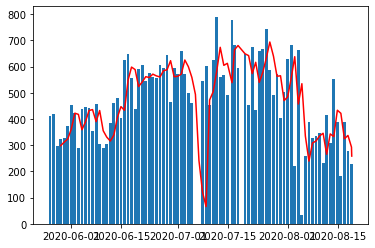

In [111]:
plt.bar(result.timestamp, result['New_cases'])
plt.plot(result.timestamp, result['Outcome_next_day_direction'], color ='red')

<Figure size 14400x21600 with 0 Axes>

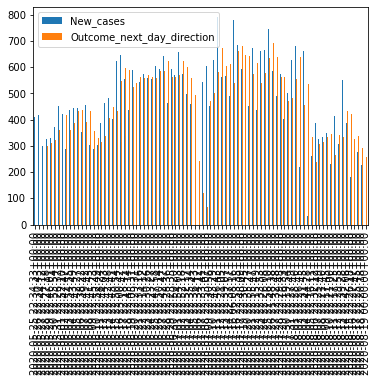

In [104]:
figure =  plt.figure(figsize=(200,300))
result[['New_cases', 'Outcome_next_day_direction']].plot(kind = 'bar')
#result['Outcome_next_day_direction'].plot(kind = 'line',marker = 'o', color = 'red', use_index = True)
#result['Outcome_next_day_direction'].plot(secondary_y=True)

In [112]:
from sklearn.linear_model import LinearRegression

In [113]:
from sklearn.model_selection import train_test_split

In [114]:
regressiondata = summed_data.copy()

In [115]:
timestamps_to_reverse = np.array(regressiondata['Unnamed: 0'])

In [116]:
timestamps_reversed = np.sort(timestamps_to_reverse)
regressiondata['Unnamed: 0'] = timestamps_reversed
#regressiondata

In [117]:
#create a dummy tail for the dataset to be predicted by regression model
dummyarray = np.full((30, 39), np.nan)
dfnans = pd.DataFrame(dummyarray)

dfnans.columns = regressiondata.columns
#dfnans

In [118]:
len(dfnans)

30

In [119]:
last_time_stamp = max(timestamps_reversed).split(' ')[0]
last_time_stamp

prediction_timestamps = []
for i in range(1, 31):
    
    date_to_add = datetime.datetime.strptime(last_time_stamp, "%Y-%m-%d")
    end_date = date_1 + datetime.timedelta(days=i)
    end_d_stamp = pd.to_datetime(end_date, utc = True)
    prediction_timestamps.append(end_d_stamp)

len(prediction_timestamps)

30

In [120]:
dfnans['Unnamed: 0'] = prediction_timestamps

In [121]:

unnamed = regressiondata['Unnamed: 0'].tolist()
datelist = []
for date in range(len(unnamed)):
    newdate = int(unnamed[date].split(' ')[0].replace('-', ''))
    datelist.append(newdate)

datelist


[20200525,
 20200526,
 20200527,
 20200528,
 20200529,
 20200530,
 20200531,
 20200601,
 20200602,
 20200603,
 20200604,
 20200605,
 20200606,
 20200607,
 20200608,
 20200609,
 20200610,
 20200611,
 20200612,
 20200613,
 20200614,
 20200615,
 20200616,
 20200617,
 20200618,
 20200619,
 20200620,
 20200621,
 20200622,
 20200623,
 20200624,
 20200625,
 20200626,
 20200627,
 20200628,
 20200629,
 20200630,
 20200701,
 20200702,
 20200703,
 20200704,
 20200705,
 20200706,
 20200707,
 20200708,
 20200709,
 20200710,
 20200711,
 20200712,
 20200713,
 20200714,
 20200716,
 20200716,
 20200717,
 20200719,
 20200720,
 20200721,
 20200722,
 20200723,
 20200724,
 20200725,
 20200726,
 20200727,
 20200728,
 20200729,
 20200730,
 20200731,
 20200801,
 20200802,
 20200803,
 20200804,
 20200805,
 20200806,
 20200807,
 20200808,
 20200809,
 20200810,
 20200811,
 20200812,
 20200813,
 20200814,
 20200815,
 20200816,
 20200817,
 20200818]

In [122]:
regr_data = regressiondata.copy()
regr_data['Unnamed: 0'] = datelist

prediction_accuracy = []

for state in regr_data.columns[1:-1].tolist():
    
    X = regr_data['Unnamed: 0']
    y = regr_data[state]

    X = np.array(X)
    X = X.reshape(-1, 1)

    model = LinearRegression()
    X_train, X_test, y_train, y_test = train_test_split(
        X, 
        y, 
        random_state=8, 
        test_size=0.33
    )

    model = LinearRegression()
    model.fit(X_train, y_train)
    
    prediction_accuracy.append(model.score(X_test, y_test))
    #print(f'{state} prediction accuracy {model.score(X_test, y_test)}')
    #y_pred = model.predict(X_test)
    #y_pred
#prediction_accuracy

In [211]:
accuracy_dict = {}
accuracy_dict['State'] = regr_data.columns[1:-1].tolist()
accuracy_dict['Prediction_accuracy'] = prediction_accuracy
accuracy_df = pd.DataFrame(accuracy_dict)
#accuracy_df
accuracy_df.to_csv('data/accuracy_df.csv')

In [123]:
regr_data

,Unnamed: 0,Abia,Adamawa,Akwa Ibom,Anambra,Bauchi,Bayelsa,Benue,Borno,Cross River,...,Ondo,Osun,Oyo,Plateau,Rivers,Sokoto,Taraba,Yobe,Zamfara,Nigeria
0,20200525,2.0,0.0,0.0,4.0,11.0,0.0,0,0.0,0,...,30.0,0,13.0,21.0,1.0,0.0,0.0,0.0,0,410.0
1,20200526,30.0,0.0,0.0,25.0,24.0,0.0,0,0.0,0,...,68.0,0,22.0,41.0,1.0,0.0,0.0,0.0,0,827.0
2,20200527,30.0,0.0,4.0,25.0,25.0,0.0,0,3.0,4,...,82.0,17,28.0,149.0,2.0,0.0,0.0,0.0,0,1125.0
3,20200528,30.0,0.0,4.0,25.0,26.0,0.0,0,4.0,4,...,90.0,25,37.0,168.0,14.0,0.0,0.0,0.0,0,1450.0
4,20200529,30.0,0.0,9.0,25.0,27.0,6.0,0,8.0,4,...,90.0,35,45.0,192.0,16.0,0.0,0.0,0.0,0,1779.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
80,20200814,663.0,143.0,205.0,170.0,362.0,310.0,390,406.0,69,...,1306.0,673,2651.0,1710.0,1711.0,39.0,55.0,18.0,0,38744.0
81,20200815,663.0,143.0,215.0,170.0,363.0,310.0,390,407.0,69,...,1306.0,673,2659.0,1712.0,1716.0,39.0,55.0,18.0,0,38926.0
82,20200816,665.0,154.0,226.0,171.0,363.0,310.0,392,408.0,69,...,1306.0,673,2661.0,1714.0,1730.0,39.0,55.0,18.0,0,39315.0
83,20200817,666.0,154.0,226.0,171.0,364.0,310.0,392,409.0,69,...,1307.0,673,2667.0,1714.0,1766.0,39.0,55.0,18.0,0,39591.0


In [140]:

unnamed1 = dfnans['Unnamed: 0'].tolist()
nans_datelist = []
for date in range(len(unnamed1)):
    newdate = int(unnamed[date].split(' ')[0].replace('-', ''))
    nans_datelist.append(newdate)

predicted = dfnans.copy()
dfnans1 = dfnans.copy()
predicted['Unnamed: 0'] = nans_datelist

prediction_data = {}

for state in predicted.columns[1:-1].tolist():
    
    X = regr_data['Unnamed: 0']
    y = regr_data[state]

    X = np.array(X)
    X = X.reshape(-1, 1)

    X_test = predicted['Unnamed: 0']
    X_test = np.array(X_test)
    X_test = X_test.reshape(-1, 1)

    model = LinearRegression()
    model.fit(X, y)
    
    #prediction_accuracy.append(model.score(X_test, y_test))
    #print(f'{state} prediction accuracy {model.score(X_test, y_test)}')
    y_pred = model.predict(X_test)
    dfnans[state] = y_pred
#prediction_accuracy

ValueError: could not convert string to float: '2020-05-25 22:34:33+00:00'

In [131]:
dfnans1

,Unnamed: 0,Abia,Adamawa,Akwa Ibom,Anambra,Bauchi,Bayelsa,Benue,Borno,Cross River,...,Ondo,Osun,Oyo,Plateau,Rivers,Sokoto,Taraba,Yobe,Zamfara,Nigeria
0,2020-08-19 00:00:00+00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2020-08-20 00:00:00+00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2020-08-21 00:00:00+00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2020-08-22 00:00:00+00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2020-08-23 00:00:00+00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,2020-08-24 00:00:00+00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,2020-08-25 00:00:00+00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,2020-08-26 00:00:00+00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,2020-08-27 00:00:00+00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,2020-08-28 00:00:00+00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [132]:
frames = [regressiondata, dfnans1]

bar_data = pd.concat(frames)

In [134]:
regressiondata

,Unnamed: 0,Abia,Adamawa,Akwa Ibom,Anambra,Bauchi,Bayelsa,Benue,Borno,Cross River,...,Ondo,Osun,Oyo,Plateau,Rivers,Sokoto,Taraba,Yobe,Zamfara,Nigeria
0,2020-05-25 22:34:33+00:00,2.0,0.0,0.0,4.0,11.0,0.0,0,0.0,0,...,30.0,0,13.0,21.0,1.0,0.0,0.0,0.0,0,410.0
1,2020-05-26 22:30:43+00:00,30.0,0.0,0.0,25.0,24.0,0.0,0,0.0,0,...,68.0,0,22.0,41.0,1.0,0.0,0.0,0.0,0,827.0
2,2020-05-27 22:44:12+00:00,30.0,0.0,4.0,25.0,25.0,0.0,0,3.0,4,...,82.0,17,28.0,149.0,2.0,0.0,0.0,0.0,0,1125.0
3,2020-05-28 22:27:18+00:00,30.0,0.0,4.0,25.0,26.0,0.0,0,4.0,4,...,90.0,25,37.0,168.0,14.0,0.0,0.0,0.0,0,1450.0
4,2020-05-29 22:46:01+00:00,30.0,0.0,9.0,25.0,27.0,6.0,0,8.0,4,...,90.0,35,45.0,192.0,16.0,0.0,0.0,0.0,0,1779.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
80,2020-08-14 22:42:06+00:00,663.0,143.0,205.0,170.0,362.0,310.0,390,406.0,69,...,1306.0,673,2651.0,1710.0,1711.0,39.0,55.0,18.0,0,38744.0
81,2020-08-15 22:26:18+00:00,663.0,143.0,215.0,170.0,363.0,310.0,390,407.0,69,...,1306.0,673,2659.0,1712.0,1716.0,39.0,55.0,18.0,0,38926.0
82,2020-08-16 22:27:47+00:00,665.0,154.0,226.0,171.0,363.0,310.0,392,408.0,69,...,1306.0,673,2661.0,1714.0,1730.0,39.0,55.0,18.0,0,39315.0
83,2020-08-17 22:25:45+00:00,666.0,154.0,226.0,171.0,364.0,310.0,392,409.0,69,...,1307.0,673,2667.0,1714.0,1766.0,39.0,55.0,18.0,0,39591.0


In [138]:
bar_data.iloc[0:-30,:]

,Unnamed: 0,Abia,Adamawa,Akwa Ibom,Anambra,Bauchi,Bayelsa,Benue,Borno,Cross River,...,Ondo,Osun,Oyo,Plateau,Rivers,Sokoto,Taraba,Yobe,Zamfara,Nigeria
0,2020-05-25 22:34:33+00:00,2.0,0.0,0.0,4.0,11.0,0.0,0.0,0.0,0.0,...,30.0,0.0,13.0,21.0,1.0,0.0,0.0,0.0,0.0,410.0
1,2020-05-26 22:30:43+00:00,30.0,0.0,0.0,25.0,24.0,0.0,0.0,0.0,0.0,...,68.0,0.0,22.0,41.0,1.0,0.0,0.0,0.0,0.0,827.0
2,2020-05-27 22:44:12+00:00,30.0,0.0,4.0,25.0,25.0,0.0,0.0,3.0,4.0,...,82.0,17.0,28.0,149.0,2.0,0.0,0.0,0.0,0.0,1125.0
3,2020-05-28 22:27:18+00:00,30.0,0.0,4.0,25.0,26.0,0.0,0.0,4.0,4.0,...,90.0,25.0,37.0,168.0,14.0,0.0,0.0,0.0,0.0,1450.0
4,2020-05-29 22:46:01+00:00,30.0,0.0,9.0,25.0,27.0,6.0,0.0,8.0,4.0,...,90.0,35.0,45.0,192.0,16.0,0.0,0.0,0.0,0.0,1779.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
80,2020-08-14 22:42:06+00:00,663.0,143.0,205.0,170.0,362.0,310.0,390.0,406.0,69.0,...,1306.0,673.0,2651.0,1710.0,1711.0,39.0,55.0,18.0,0.0,38744.0
81,2020-08-15 22:26:18+00:00,663.0,143.0,215.0,170.0,363.0,310.0,390.0,407.0,69.0,...,1306.0,673.0,2659.0,1712.0,1716.0,39.0,55.0,18.0,0.0,38926.0
82,2020-08-16 22:27:47+00:00,665.0,154.0,226.0,171.0,363.0,310.0,392.0,408.0,69.0,...,1306.0,673.0,2661.0,1714.0,1730.0,39.0,55.0,18.0,0.0,39315.0
83,2020-08-17 22:25:45+00:00,666.0,154.0,226.0,171.0,364.0,310.0,392.0,409.0,69.0,...,1307.0,673.0,2667.0,1714.0,1766.0,39.0,55.0,18.0,0.0,39591.0


In [127]:
len(bar_data['Unnamed: 0'])

115

In [142]:
bar_data

,Unnamed: 0,Abia,Adamawa,Akwa Ibom,Anambra,Bauchi,Bayelsa,Benue,Borno,Cross River,...,Ondo,Osun,Oyo,Plateau,Rivers,Sokoto,Taraba,Yobe,Zamfara,Nigeria
0,2020-05-25 22:34:33+00:00,2.0,0.0,0.0,4.0,11.0,0.0,0.0,0.0,0.0,...,30.0,0.0,13.0,21.0,1.0,0.0,0.0,0.0,0.0,410.0
1,2020-05-26 22:30:43+00:00,30.0,0.0,0.0,25.0,24.0,0.0,0.0,0.0,0.0,...,68.0,0.0,22.0,41.0,1.0,0.0,0.0,0.0,0.0,827.0
2,2020-05-27 22:44:12+00:00,30.0,0.0,4.0,25.0,25.0,0.0,0.0,3.0,4.0,...,82.0,17.0,28.0,149.0,2.0,0.0,0.0,0.0,0.0,1125.0
3,2020-05-28 22:27:18+00:00,30.0,0.0,4.0,25.0,26.0,0.0,0.0,4.0,4.0,...,90.0,25.0,37.0,168.0,14.0,0.0,0.0,0.0,0.0,1450.0
4,2020-05-29 22:46:01+00:00,30.0,0.0,9.0,25.0,27.0,6.0,0.0,8.0,4.0,...,90.0,35.0,45.0,192.0,16.0,0.0,0.0,0.0,0.0,1779.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25,2020-09-13 00:00:00+00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
26,2020-09-14 00:00:00+00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
27,2020-09-15 00:00:00+00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
28,2020-09-16 00:00:00+00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [151]:

unnamed2 = bar_data['Unnamed: 0'].tolist()
nans_datelist = []
for date in range(len(unnamed2)):
    newdate = int(str(unnamed2[date]).split(' ')[0].replace('-', ''))
    nans_datelist.append(newdate)

bar_data_c = bar_data.copy()
dfnans1 = dfnans.copy()
bar_data_c['Unnamed: 0'] = nans_datelist

prediction_data = {}

for state in predicted.columns[1:-1].tolist():
    
    X = bar_data_c.iloc[0:-30,:]['Unnamed: 0']
    y = bar_data_c.iloc[0:-30,:][state]

    X = np.array(X)
    X = X.reshape(-1, 1)

    X_test = bar_data_c.iloc[-30:,:]['Unnamed: 0']
    X_test = np.array(X_test)
    X_test = X_test.reshape(-1, 1)

    model = LinearRegression()
    model.fit(X, y)
    
    #prediction_accuracy.append(model.score(X_test, y_test))
    #print(f'{state} prediction accuracy {model.score(X_test, y_test)}')
    y_pred = model.predict(X_test)
    dfnans[state] = y_pred
#prediction_accuracy

In [154]:
frames = [regressiondata, dfnans]

bar_data2 = pd.concat(frames)

In [155]:
bar_data2

,Unnamed: 0,Abia,Adamawa,Akwa Ibom,Anambra,Bauchi,Bayelsa,Benue,Borno,Cross River,...,Ondo,Osun,Oyo,Plateau,Rivers,Sokoto,Taraba,Yobe,Zamfara,Nigeria
0,2020-05-25 22:34:33+00:00,2.000000,0.000000,0.000000,4.000000,11.000000,0.000000,0.000000,0.000000,0.000000,...,30.000000,0.000000,13.000000,21.000000,1.000000,0.000000,0.000000,0.000000,0.0,410.0
1,2020-05-26 22:30:43+00:00,30.000000,0.000000,0.000000,25.000000,24.000000,0.000000,0.000000,0.000000,0.000000,...,68.000000,0.000000,22.000000,41.000000,1.000000,0.000000,0.000000,0.000000,0.0,827.0
2,2020-05-27 22:44:12+00:00,30.000000,0.000000,4.000000,25.000000,25.000000,0.000000,0.000000,3.000000,4.000000,...,82.000000,17.000000,28.000000,149.000000,2.000000,0.000000,0.000000,0.000000,0.0,1125.0
3,2020-05-28 22:27:18+00:00,30.000000,0.000000,4.000000,25.000000,26.000000,0.000000,0.000000,4.000000,4.000000,...,90.000000,25.000000,37.000000,168.000000,14.000000,0.000000,0.000000,0.000000,0.0,1450.0
4,2020-05-29 22:46:01+00:00,30.000000,0.000000,9.000000,25.000000,27.000000,6.000000,0.000000,8.000000,4.000000,...,90.000000,35.000000,45.000000,192.000000,16.000000,0.000000,0.000000,0.000000,0.0,1779.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25,2020-09-13 00:00:00+00:00,873.431279,211.821763,314.653814,217.369269,401.326464,413.848860,587.372347,477.304626,104.000258,...,1924.702192,996.108330,3777.506161,2425.458335,2275.092180,44.584582,84.265529,19.790880,0.0,NaN
26,2020-09-14 00:00:00+00:00,875.773171,212.375690,315.494619,217.909199,402.481087,415.108175,588.851601,478.616057,104.224710,...,1929.581572,998.419467,3787.994148,2430.728519,2281.491625,44.729508,84.458711,19.850601,0.0,NaN
27,2020-09-15 00:00:00+00:00,878.115064,212.929616,316.335424,218.449128,403.635710,416.367490,590.330855,479.927488,104.449162,...,1934.460951,1000.730605,3798.482135,2435.998704,2287.891070,44.874433,84.651893,19.910322,0.0,NaN
28,2020-09-16 00:00:00+00:00,880.456956,213.483543,317.176229,218.989057,404.790332,417.626805,591.810109,481.238919,104.673614,...,1939.340331,1003.041743,3808.970122,2441.268888,2294.290515,45.019359,84.845075,19.970042,0.0,NaN


In [180]:
bar_data2.to_csv('data/bar_data_predictions.csv')


In [181]:
bar_data_c.to_csv('data/bar_data_knowns.csv')

In [179]:
#states_list = data.columns[1:].tolist()

def f(State):
       
    fig = px.line(x=bar_data2['Unnamed: 0'], y=bar_data2[State],labels=dict(x='Date', y="Number of Covid-19 cases"))
    fig.add_bar(x=bar_data2['Unnamed: 0'], y=bar_data_c[State])
    fig.update_layout(showlegend=False)
   
    return fig
fig6 = interact(f, State=states_list)
fig6

interactive(children=(Dropdown(description='State', options=('Abia', 'Adamawa', 'Akwa Ibom', 'Anambra', 'Bauch…

<function __main__.f(State)>